In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.float64)


In [3]:
svm_clf = Pipeline([
    ("Scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge")),
])
clf = svm_clf.fit(X,y)

In [4]:
decision_function = clf.decision_function(X)



In [5]:
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

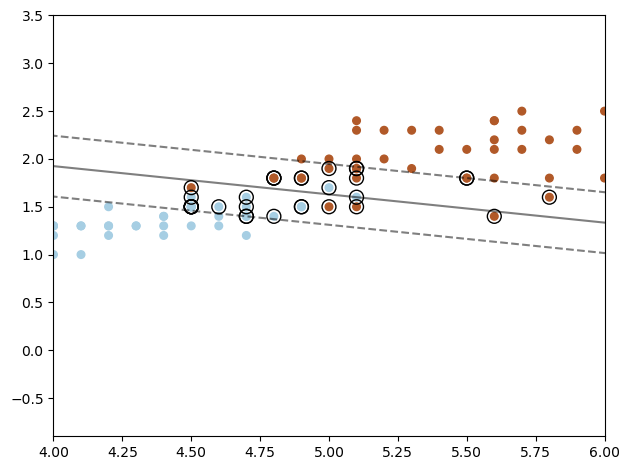

In [6]:
 plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
 ax = plt.gca()
 DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.xlim(4.0, 6)
plt.tight_layout()

In [7]:
svm_clf.set_params(linear_svc__C=50)
clf2 = svm_clf.fit(X,y)
decision_function_2 = clf2.decision_function(X)
support_vector_indices_2 = np.where(np.abs(decision_function_2) <= 1 + 1e-15)[0]
support_vectors_2 = X[support_vector_indices_2]

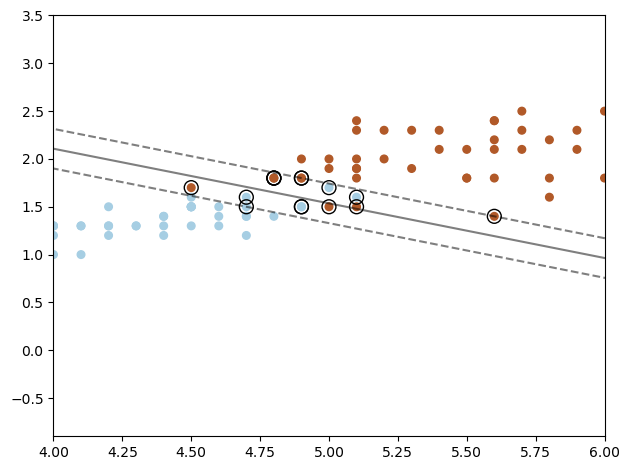

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.scatter(
        support_vectors_2[:, 0],
        support_vectors_2[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
        clf2,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
plt.xlim(4.0, 6)
plt.tight_layout()

## LinearSVC
- the LinearSVC class regularizes the bias term; the training set should be centered e.g. using StandardScaler|

## Nonlinear SVM Classification

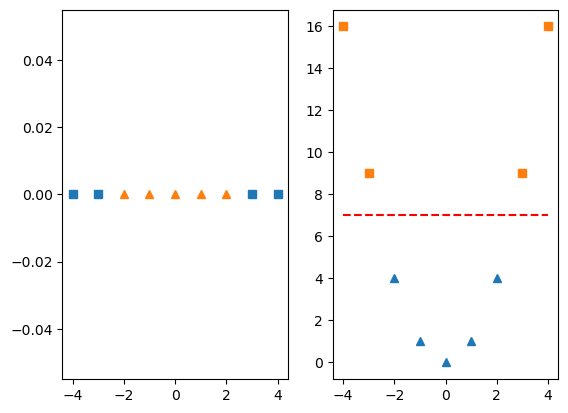

In [31]:
xorigin = np.linspace(-4,4,9)
val = 0
x1= xorigin[np.abs(xorigin)>2]
x0= xorigin[np.abs(xorigin)<=2]
y1= x1**2
y0 = x0**2
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(x1,np.zeros_like(x1)+val,'s')
ax1.plot(x0,np.zeros_like(x0)+val,'^')
ax2.plot(x0,y0,'^')
ax2.plot(x1,y1,'s')
y=np.ones(9)*7
ax2.plot(xorigin,y,'r--')